# Base weighted graph class
## It consists of:
### - addVertex() method to add vertex to weighted graph
### - addEdge() method to add edges and weights between vertexes
### - getNeighbors() method to get all vertex neighbors and their edge weights
### - changeEdgeWeight() method to change edges weights

# WARNING!
### Running the cells requires networkx library to get visual representation of your graph!

In [81]:
import matplotlib.pyplot as plt
# TO RUN VISUAL GRAPHS CELLS YOU NEED TO HAVE networkx LIBRARY
# INSTALLED IN ANACONDA ENVIRONMENT!!
import networkx as nx

class Graph:
    def __init__(self):
        # Graph as an adjency list 
        self.graph = {}
    
    def addVertex(self, vertex):
        if vertex not in self.graph:
            self.graph[vertex] = {}
        else:
            print(f"Vertex '{vertex}' already exists")
    
    def addEdge(self, start, end, weight):
        if start not in self.graph:
            self.addVertex(end)
        if end not in self.graph:
            self.addVertex(end)

        # Adding edges in both directions to achieve undirected graph
        self.graph[start][end] = weight
        # To make the graph directed delete line below
        self.graph[end][start] = weight

    def getNeighbors(self, vertex):
        if vertex not in self.graph:
            print(f"Vertex '{vertex}' found.")
            return []
        
        neighbors = self.graph[vertex]
        print(f"Neighbors of '{vertex}':")
        for neighbor, weight in neighbors.items():
            print(f"  {neighbor} (Weight: {weight})")

    def changeEdgeWeight(self, start, end, new_weight):
        if start in self.graph and end in self.graph[start]:
            self.graph[start][end] = new_weight
            self.graph[end][start] = new_weight
        else:
            print(f"Edge between '{start}' and '{end}' wasn't found!")

    def graphAsAdjacencyList(self):
        for vertex, edges in self.graph.items():
            print(f"{vertex}: {edges}")

    # Function created using ChatGPT!!
    def visualizeGraph(self):
        G = nx.Graph()  # Creating a NetworkX graph object

        for vertex, edges in self.graph.items():
            for neighbor, weight in edges.items():
                G.add_edge(vertex, neighbor, weight=weight)

        # Custom grid layout for nodes
        pos = {
            "A": (1, 3),
            "B": (3, 3),
            "C": (0, 2),
            "D": (1, 2),
            "E": (3, 2),
            "F": (0, 0),
            "G": (1, 0),
            "H": (3, 0),
        }

        # Extracting edge weights
        edge_labels = nx.get_edge_attributes(G, 'weight')
        # Drawing the graph
        nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=15, font_weight='bold')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)
        plt.title("Weighted Graph Instance")
        plt.show()
        

# Creating the base graph instance

Graph representation as adjency list:
A: {'B': 2, 'C': 1, 'D': 7, 'E': 9}
B: {'A': 2, 'E': 1}
C: {'A': 1, 'G': 12, 'F': 6}
D: {'A': 7, 'G': 2, 'E': 3}
E: {'A': 9, 'B': 1, 'D': 3, 'G': 8, 'H': 7}
F: {'C': 6, 'G': 2}
G: {'C': 12, 'D': 2, 'E': 8, 'F': 2, 'H': 1}
H: {'E': 7, 'G': 1}


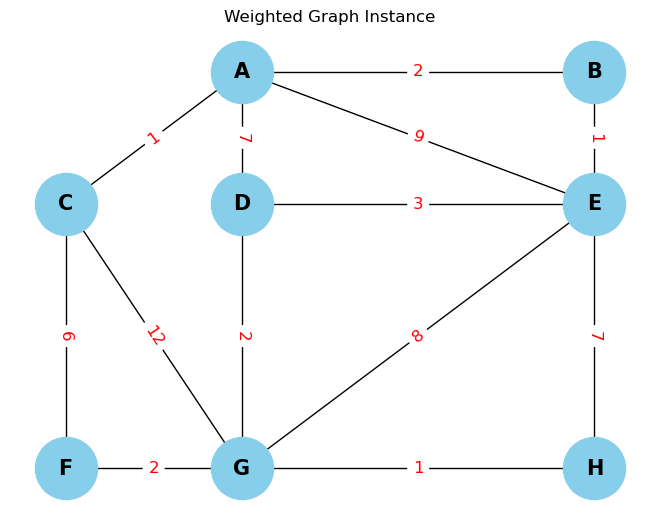

In [83]:
graph = Graph()

# Adding vertices
vertices = ["A", "B", "C", "D", "E", "F", "G", "H"]
for vertex in vertices:
    graph.addVertex(vertex)

# Adding edges with weights
edges = [
    ("A", "B", 2),
    ("A", "C", 1),
    ("A", "D", 7),
    ("A", "E", 9),
    ("B", "E", 1),
    ("C", "G", 12),
    ("C", "F", 6),
    ("D", "G", 2),
    ("D", "E", 3),
    ("E", "G", 8),
    ("E", "H", 7),
    ("F", "G", 2),
    ("G", "H", 1),
]

for start, end, weight in edges:
    graph.addEdge(start, end, weight)
print("Graph representation as adjency list:")
graph.graphAsAdjacencyList()
graph.visualizeGraph()


# Changing edges weights

A: {'B': 9, 'C': 7, 'D': 1, 'E': 9}
B: {'A': 9, 'E': 1}
C: {'A': 7, 'G': 12, 'F': 6}
D: {'A': 1, 'G': 2, 'E': 3}
E: {'A': 9, 'B': 1, 'D': 3, 'G': 8, 'H': 7}
F: {'C': 6, 'G': 2}
G: {'C': 12, 'D': 2, 'E': 8, 'F': 2, 'H': 10}
H: {'E': 7, 'G': 10}


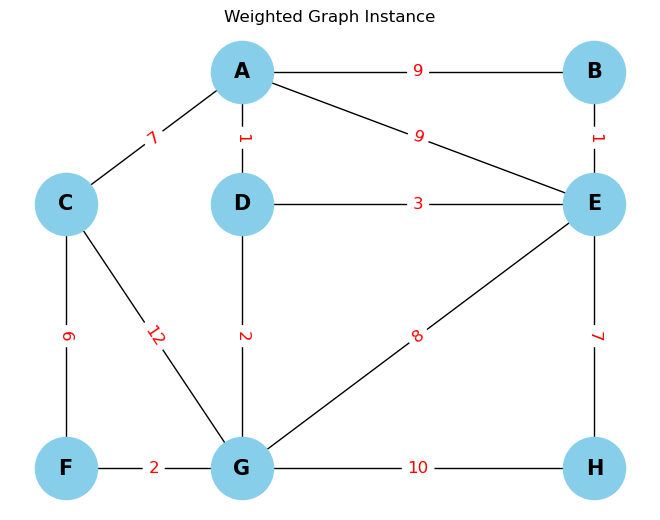

In [90]:
graph.changeEdgeWeight("A","C",7)
graph.changeEdgeWeight("A","D",1)
graph.changeEdgeWeight("A","B",9)
graph.changeEdgeWeight("G","H",10)

graph.graphAsAdjacencyList()
graph.visualizeGraph()



# Getting the vertex neighbors

In [88]:
graph.getNeighbors("A")
graph.getNeighbors("G")
graph.getNeighbors("D")

Neighbors of 'A':
  B (Weight: 2)
  C (Weight: 1)
  D (Weight: 7)
  E (Weight: 9)
Neighbors of 'G':
  C (Weight: 12)
  D (Weight: 2)
  E (Weight: 8)
  F (Weight: 2)
  H (Weight: 1)
Neighbors of 'D':
  A (Weight: 7)
  G (Weight: 2)
  E (Weight: 3)
